In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
from glob import glob
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("F://DataSet/archive/HAM10000_metadata.csv")

In [3]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [4]:
len(df["image_id"])

10015

In [5]:
path_to_images = "F://DataSet/archive/"

In [6]:
image_files = glob(os.path.join(path_to_images,"*","*.jpg"))

In [7]:
image_path = {os.path.splitext(os.path.basename(x))[0]:x for x in image_files}

In [8]:
image_path

{'ISIC_0024306': 'F://DataSet/archive\\HAM10000_images_part_1\\ISIC_0024306.jpg',
 'ISIC_0024307': 'F://DataSet/archive\\HAM10000_images_part_1\\ISIC_0024307.jpg',
 'ISIC_0024308': 'F://DataSet/archive\\HAM10000_images_part_1\\ISIC_0024308.jpg',
 'ISIC_0024309': 'F://DataSet/archive\\HAM10000_images_part_1\\ISIC_0024309.jpg',
 'ISIC_0024310': 'F://DataSet/archive\\HAM10000_images_part_1\\ISIC_0024310.jpg',
 'ISIC_0024311': 'F://DataSet/archive\\HAM10000_images_part_1\\ISIC_0024311.jpg',
 'ISIC_0024312': 'F://DataSet/archive\\HAM10000_images_part_1\\ISIC_0024312.jpg',
 'ISIC_0024313': 'F://DataSet/archive\\HAM10000_images_part_1\\ISIC_0024313.jpg',
 'ISIC_0024314': 'F://DataSet/archive\\HAM10000_images_part_1\\ISIC_0024314.jpg',
 'ISIC_0024315': 'F://DataSet/archive\\HAM10000_images_part_1\\ISIC_0024315.jpg',
 'ISIC_0024316': 'F://DataSet/archive\\HAM10000_images_part_1\\ISIC_0024316.jpg',
 'ISIC_0024317': 'F://DataSet/archive\\HAM10000_images_part_1\\ISIC_0024317.jpg',
 'ISIC_0024318':

In [9]:
df['path']=df['image_id'].map(image_path.get)

In [10]:
df['image_id']

0        ISIC_0027419
1        ISIC_0025030
2        ISIC_0026769
3        ISIC_0025661
4        ISIC_0031633
             ...     
10010    ISIC_0033084
10011    ISIC_0033550
10012    ISIC_0033536
10013    ISIC_0032854
10014    ISIC_0032258
Name: image_id, Length: 10015, dtype: object

In [11]:
df["image"]=df["path"].map(lambda x:np.asarray(Image.open(x).resize((32,32))))

In [12]:
print(df["dx"].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [13]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,F://DataSet/archive\HAM10000_images_part_1\ISI...,"[[[191, 152, 192], [194, 154, 193], [196, 152,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,F://DataSet/archive\HAM10000_images_part_1\ISI...,"[[[24, 14, 29], [56, 39, 64], [106, 80, 112], ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,F://DataSet/archive\HAM10000_images_part_1\ISI...,"[[[190, 136, 150], [199, 145, 161], [200, 141,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,F://DataSet/archive\HAM10000_images_part_1\ISI...,"[[[35, 18, 28], [83, 51, 64], [128, 88, 103], ..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,F://DataSet/archive\HAM10000_images_part_2\ISI...,"[[[155, 110, 135], [188, 139, 168], [210, 157,..."
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,F://DataSet/archive\HAM10000_images_part_2\ISI...,"[[[181, 164, 179], [179, 162, 176], [180, 163,..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,F://DataSet/archive\HAM10000_images_part_2\ISI...,"[[[4, 5, 3], [24, 22, 21], [101, 88, 88], [128..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,F://DataSet/archive\HAM10000_images_part_2\ISI...,"[[[132, 119, 120], [157, 139, 138], [177, 158,..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,F://DataSet/archive\HAM10000_images_part_2\ISI...,"[[[160, 123, 144], [163, 131, 152], [166, 128,..."


In [14]:
df["image"][0]

array([[[191, 152, 192],
        [194, 154, 193],
        [196, 152, 184],
        ...,
        [195, 149, 159],
        [197, 155, 164],
        [194, 152, 161]],

       [[196, 161, 199],
        [200, 161, 199],
        [200, 158, 191],
        ...,
        [195, 150, 154],
        [197, 157, 165],
        [192, 151, 164]],

       [[198, 159, 198],
        [199, 158, 194],
        [201, 157, 190],
        ...,
        [197, 155, 161],
        [198, 159, 175],
        [194, 156, 177]],

       ...,

       [[192, 157, 192],
        [204, 172, 204],
        [206, 168, 196],
        ...,
        [189, 151, 177],
        [191, 157, 183],
        [193, 162, 196]],

       [[183, 150, 181],
        [199, 167, 194],
        [202, 164, 189],
        ...,
        [180, 136, 154],
        [188, 154, 176],
        [189, 158, 188]],

       [[170, 134, 163],
        [186, 148, 175],
        [196, 156, 178],
        ...,
        [176, 131, 146],
        [184, 149, 169],
        [184, 153, 176]]

In [15]:
df['dx_code'] = pd.Categorical(df['dx']).codes

In [16]:
print(df['dx_code'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: dx_code, dtype: int64


In [17]:
print(df["dx_code"][10014])

4


In [18]:
x = df['image']
y = df['dx_code']
y=to_categorical(
    y,num_classes=7,dtype='float32'
)

In [19]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [20]:
classes=["akiec","bcc","bkl","df","mel","nv","vas"]

In [68]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

In [21]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [22]:
y_test[2002]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [23]:
len(x_train)

8012

In [24]:
len(x_test)

2003

In [25]:
x_train[1].shape

(32, 32, 3)

In [26]:
x_train[1][0]

array([[ 24,  14,  29],
       [ 56,  39,  64],
       [106,  80, 112],
       [143, 112, 144],
       [167, 135, 164],
       [173, 134, 159],
       [177, 133, 158],
       [178, 127, 159],
       [185, 137, 161],
       [195, 152, 183],
       [197, 150, 185],
       [200, 161, 195],
       [203, 167, 207],
       [205, 167, 200],
       [207, 162, 199],
       [205, 161, 198],
       [205, 165, 185],
       [207, 161, 185],
       [209, 167, 193],
       [205, 158, 181],
       [202, 156, 184],
       [198, 149, 177],
       [201, 153, 187],
       [201, 152, 188],
       [200, 153, 194],
       [192, 147, 176],
       [183, 138, 156],
       [165, 122, 125],
       [139, 103, 105],
       [109,  79,  91],
       [ 72,  48,  72],
       [ 60,  37,  62]], dtype=uint8)

In [27]:
x_train=x_train/255
x_test=x_test/255
x_train[1].shape

(32, 32, 3)

In [28]:
x_train[1]

array([[[0.09411765, 0.05490196, 0.11372549],
        [0.21960784, 0.15294118, 0.25098039],
        [0.41568627, 0.31372549, 0.43921569],
        ...,
        [0.42745098, 0.30980392, 0.35686275],
        [0.28235294, 0.18823529, 0.28235294],
        [0.23529412, 0.14509804, 0.24313725]],

       [[0.1372549 , 0.09019608, 0.16862745],
        [0.31764706, 0.22745098, 0.33333333],
        [0.49411765, 0.36862745, 0.49803922],
        ...,
        [0.49411765, 0.37254902, 0.39215686],
        [0.33333333, 0.22352941, 0.27058824],
        [0.23921569, 0.14901961, 0.24313725]],

       [[0.21960784, 0.15294118, 0.23921569],
        [0.41176471, 0.29803922, 0.38431373],
        [0.56470588, 0.42745098, 0.55294118],
        ...,
        [0.56470588, 0.44313725, 0.4745098 ],
        [0.41568627, 0.30980392, 0.34509804],
        [0.2745098 , 0.18431373, 0.2745098 ]],

       ...,

       [[0.23529412, 0.15294118, 0.25098039],
        [0.32156863, 0.21960784, 0.32156863],
        [0.47843137, 0

In [29]:
y_train[2002]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

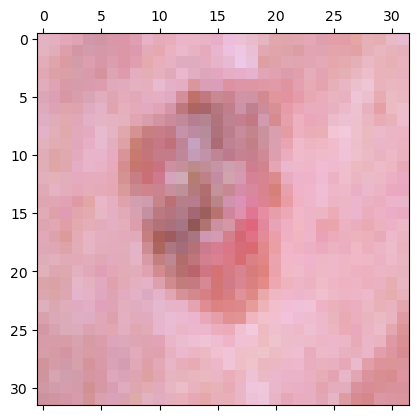

In [30]:
plt.matshow(x_train[9])

In [31]:
x_train = np.array(x_train.tolist())
x_test = np.array(x_test.tolist())
x_test

array([[[[0.61568627, 0.30980392, 0.43137255],
         [0.60392157, 0.27058824, 0.38823529],
         [0.63137255, 0.29019608, 0.43137255],
         ...,
         [0.6745098 , 0.5372549 , 0.55294118],
         [0.64313725, 0.47843137, 0.50196078],
         [0.62745098, 0.45882353, 0.50588235]],

        [[0.64705882, 0.34509804, 0.45490196],
         [0.63137255, 0.28235294, 0.43529412],
         [0.65882353, 0.30196078, 0.45098039],
         ...,
         [0.68627451, 0.54117647, 0.55294118],
         [0.65490196, 0.48235294, 0.52941176],
         [0.63529412, 0.4627451 , 0.51372549]],

        [[0.6627451 , 0.33333333, 0.4745098 ],
         [0.68235294, 0.35294118, 0.50196078],
         [0.69019608, 0.33333333, 0.47843137],
         ...,
         [0.70196078, 0.56470588, 0.58431373],
         [0.69019608, 0.54509804, 0.58431373],
         [0.65098039, 0.49411765, 0.53333333]],

        ...,

        [[0.74509804, 0.49411765, 0.60392157],
         [0.76078431, 0.48627451, 0.59607843]

In [32]:
# model=keras.Sequential([
#     keras.layers.Flatten(input_shape=(32,32,3)),
#     keras.layers.Dense(3000,activation="relu"),
#     keras.layers.Dense(1000,activation="relu"),
#     keras.layers.Dense(7,activation="softmax")
# ])
# model.compile(
#     optimizer="SGD",
#     loss="categorical_crossentropy",
#     metrics=["accuracy"]
# )
# model.fit(x_train,y_train,epochs=10)

In [33]:
# model_drop=keras.Sequential([
#     keras.layers.Flatten(input_shape=(32,32,3)),
#     keras.layers.Dense(3000,activation="relu"),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(2000,activation="relu"),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(1000,activation="relu"),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(500,activation="relu"),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(7,activation="softmax")
# ])
# opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# model_drop.compile(
#     optimizer=opt,
#     loss="categorical_crossentropy",
#     metrics=["accuracy"]
# )
# model_drop.fit(x_train,y_train,epochs=5,batch_size=128)

In [34]:
model_con = keras.Sequential()

model_con.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',  input_shape=(32, 32, 3)))
model_con.add(tf.keras.layers.BatchNormalization())
model_con.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_con.add(tf.keras.layers.Dropout(0.15))

model_con.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',  input_shape=(32, 32, 3)))
model_con.add(tf.keras.layers.BatchNormalization())
model_con.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_con.add(tf.keras.layers.Dropout(0.15))

model_con.add(tf.keras.layers.Flatten())
model_con.add(tf.keras.layers.Dense(256, activation='relu'))
model_con.add(tf.keras.layers.Dense(7, activation='softmax'))

# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_con.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model_con.fit(x_train,y_train, batch_size=48, epochs=15, verbose=1, validation_data=(x_test,y_test))

Epoch 1/15
167/167 [==============================] - 9s 49ms/step - loss: 1.0374 - accuracy: 0.6710 - val_loss: 1.5384 - val_accuracy: 0.4588
Epoch 2/15
167/167 [==============================] - 9s 53ms/step - loss: 0.8113 - accuracy: 0.7061 - val_loss: 0.8979 - val_accuracy: 0.6950
Epoch 3/15
167/167 [==============================] - 10s 61ms/step - loss: 0.7444 - accuracy: 0.7235 - val_loss: 0.8747 - val_accuracy: 0.6990
Epoch 4/15
167/167 [==============================] - 11s 64ms/step - loss: 0.7026 - accuracy: 0.7415 - val_loss: 1.0609 - val_accuracy: 0.6885
Epoch 5/15
167/167 [==============================] - 10s 62ms/step - loss: 0.6562 - accuracy: 0.7565 - val_loss: 0.7648 - val_accuracy: 0.7174
Epoch 6/15
167/167 [==============================] - 10s 61ms/step - loss: 0.6357 - accuracy: 0.7673 - val_loss: 2.6503 - val_accuracy: 0.6730
Epoch 7/15
167/167 [==============================] - 11s 63ms/step - loss: 0.6203 - accuracy: 0.7716 - val_loss: 1.0176 - val_accuracy: 0

In [35]:
model_con.evaluate(x_test,y_test)

63/63 [==============================] - 1s 12ms/step - loss: 0.8334 - accuracy: 0.7404


[0.8333572149276733, 0.7403894066810608]

In [36]:
# model.evaluate(x_test,y_test)
# model_drop.evaluate(x_test,y_test)

In [37]:
x_test[1].shape

(32, 32, 3)

In [38]:
df['image'][0].shape

(32, 32, 3)

In [39]:
y_predict=model_con(x_test)

In [40]:
y_predict[2002]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([2.0300332e-07, 1.0723943e-08, 6.3950674e-06, 5.1029115e-08,
       1.8874340e-05, 9.9997449e-01, 1.6881755e-08], dtype=float32)>

In [41]:
y_predict[3]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([7.5839424e-05, 6.3844382e-05, 7.4945724e-01, 2.9998019e-04,
       2.4639508e-03, 2.4763916e-01, 4.7004630e-08], dtype=float32)>

In [42]:
classes[np.argmax(y_predict[20])]

'nv'

In [43]:
classes[np.argmax(y_test[20])]

'nv'

In [44]:
len(y_test)

2003

In [45]:
ori=[]
for element in y_test:
    ori.append(np.argmax(element))

In [46]:
yp=[]
for element in y_predict:
    yp.append(np.argmax(element))

In [47]:
print(classification_report(ori,yp))

              precision    recall  f1-score   support

           0       0.53      0.13      0.21        69
           1       0.51      0.38      0.43        93
           2       0.50      0.39      0.43       228
           3       0.36      0.14      0.21        28
           4       0.47      0.32      0.38       226
           5       0.81      0.95      0.87      1338
           6       0.77      0.48      0.59        21

    accuracy                           0.74      2003
   macro avg       0.57      0.40      0.45      2003
weighted avg       0.71      0.74      0.71      2003



In [48]:
model.save("skincancer.h5")

NameError: name 'model' is not defined

In [66]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

In [64]:
model_new=keras.Sequential();
model_new.add(keras.layers.Input(shape=[32,32,3]))

model_new.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer="he_normal"))
model_new.add(keras.layers.MaxPooling2D())
model_new.add(keras.layers.BatchNormalization())

model_new.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same",kernel_initializer="he_normal"))
model_new.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same",kernel_initializer="he_normal"))
model_new.add(keras.layers.MaxPooling2D())
model_new.add(keras.layers.BatchNormalization())

model_new.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same",kernel_initializer="he_normal"))
model_new.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same",kernel_initializer="he_normal"))
model_new.add(keras.layers.MaxPooling2D())
model_new.add(keras.layers.BatchNormalization())

model_new.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same",kernel_initializer="he_normal"))
model_new.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same",kernel_initializer="he_normal"))
model_new.add(keras.layers.MaxPooling2D())
model_new.add(keras.layers.BatchNormalization())

model_new.add(keras.layers.Flatten())
model_new.add(keras.layers.Dropout(rate=0.2))
model_new.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'))
model_new.add(keras.layers.BatchNormalization())

model_new.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model_new.add(keras.layers.BatchNormalization())

model_new.add(keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model_new.add(keras.layers.BatchNormalization())

model_new.add(keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L1L2()))
model_new.add(keras.layers.BatchNormalization())

model_new.add(keras.layers.Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform', name='classifier'))
model_new.compile(keras.optimizers.Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model_new.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_27 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 8, 8, 64)         

In [67]:
history = model_new.fit(x_train ,
                    y_train ,
                    epochs=25 ,
                    batch_size=128,
                    validation_data=(x_test , y_test) ,
                    callbacks=[learning_rate_reduction])

Epoch 1/25
63/63 [==============================] - 43s 633ms/step - loss: 1.5508 - accuracy: 0.5542 - val_loss: 1.9934 - val_accuracy: 0.3175 - lr: 0.0010
Epoch 2/25
63/63 [==============================] - 42s 668ms/step - loss: 1.0757 - accuracy: 0.7156 - val_loss: 2.1601 - val_accuracy: 0.3625 - lr: 0.0010
Epoch 3/25
63/63 [==============================] - 43s 690ms/step - loss: 0.8811 - accuracy: 0.7516 - val_loss: 2.6615 - val_accuracy: 0.3375 - lr: 0.0010
Epoch 4/25
63/63 [==============================] - 43s 677ms/step - loss: 0.7415 - accuracy: 0.7786 - val_loss: 1.6548 - val_accuracy: 0.5412 - lr: 0.0010
Epoch 5/25
63/63 [==============================] - 42s 671ms/step - loss: 0.6648 - accuracy: 0.7929 - val_loss: 1.8661 - val_accuracy: 0.5512 - lr: 0.0010
Epoch 6/25
63/63 [==============================] - 44s 702ms/step - loss: 0.5938 - accuracy: 0.8090 - val_loss: 0.9871 - val_accuracy: 0.7029 - lr: 0.0010
Epoch 7/25
63/63 [==============================] - 45s 712ms/st

In [69]:
model_new.evaluate(x_test,y_test)

63/63 [==============================] - 2s 31ms/step - loss: 0.9747 - accuracy: 0.7539


[0.9746674299240112, 0.7538691759109497]

In [77]:
model_new.save("skincancer.h5")